In [224]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
 
def drawlines(img1, img2, lines, pts1, pts2):
    r, c = img1.shape
    img1_color = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2_color = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])
        pt1 = (int(pt1[0][0]), int(pt1[0][1]))  # Correctly format the point for cv2.circle
        pt2 = (int(pt2[0][0]), int(pt2[0][1]))  # Correctly format the point for cv2.circle
        img1_color = cv2.line(img1_color, (x0, y0), (x1, y1), color, 1)
        img1_color = cv2.circle(img1_color, pt1, 5, color, -1)
        img2_color = cv2.circle(img2_color, pt2, 5, color, -1)
    return img1_color, img2_color
 
# Load your stereo images
imgL = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data6_2D\\IMG_2366.jpg', 0)  # QueryImage
imgR = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data6_2D\\IMG_2367.jpg', 0)  # TrainImage
 
# Initialize the SIFT detector
sift = cv2.SIFT_create()
 
# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imgL, None)
kp2, des2 = sift.detectAndCompute(imgR, None)
 
# Create BFMatcher object and match descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
 
# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)
 
# Select the top N matches
N = 107 # Number of matches you want to keep
best_matches = matches[:N]
# Extract the matched keypoints
ptsL = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 1, 2)
ptsR = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 1, 2)
 
# Find the Fundamental Matrix
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)
 
# Select only inlier points
ptsL = ptsL[mask.ravel() == 1]
ptsR = ptsR[mask.ravel() == 1]
 
# Compute the rectification transformations
ret, H1, H2 = cv2.stereoRectifyUncalibrated(ptsL, ptsR, F, imgL.shape[::-1])
 
# Apply the transformations to the images
imgL_rectified = cv2.warpPerspective(imgL, H1, (imgL.shape[1], imgL.shape[0]))
imgR_rectified = cv2.warpPerspective(imgR, H2, (imgR.shape[1], imgR.shape[0]))
 
# Compute and draw the epipolar lines
linesL = cv2.computeCorrespondEpilines(ptsR.reshape(-1, 1, 2), 2, F).reshape(-1, 3)
img5, img6 = drawlines(imgL_rectified, imgR_rectified, linesL, ptsL, ptsR)
 
linesR = cv2.computeCorrespondEpilines(ptsL.reshape(-1, 1, 2), 1, F).reshape(-1, 3)
img3, img4 = drawlines(imgR_rectified, imgL_rectified, linesR, ptsR, ptsL)
 
# Plotting the images with matched points and epipolar lines using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(img5)
axs[0].set_title('Left Rectified with Epipolar Lines')
axs[0].axis('off')
 
axs[1].imshow(img3)
axs[1].set_title('Right Rectified with Epipolar Lines')
axs[1].axis('off')
 
cv2.imwrite('D:\\CV\\L_rectified.jpg', imgL_rectified)
 
# Save the right rectified image
cv2.imwrite('D:\\CV\\R_rectified.jpg', imgR_rectified)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'cv::SIFT_Impl::detectAndCompute'


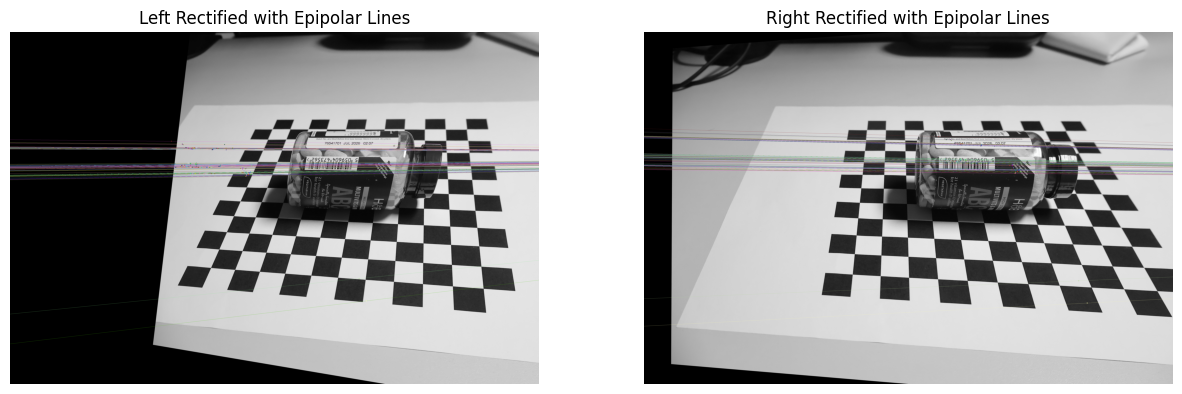

In [65]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def drawlines(img1, img2, lines, pts1, pts2):
    r, c = img1.shape[:2]
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])
        # Ensure pt1 and pt2 are single points (scalars) for cv2.circle
        pt1 = (int(pt1[0][0]), int(pt1[0][1])) if pt1.ndim > 1 else (int(pt1[0]), int(pt1[1]))
        pt2 = (int(pt2[0][0]), int(pt2[0][1])) if pt2.ndim > 1 else (int(pt2[0]), int(pt2[1]))
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, pt1, 5, color, -1)
        img2 = cv2.circle(img2, pt2, 5, color, -1)
    return img1, img2

# Load your stereo images in grayscale for feature detection
imgL = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data6_2D\\IMG_2339.jpg', 0)
imgR = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data6_2D\\IMG_2340.jpg', 0)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(imgL, None)
kp2, des2 = orb.detectAndCompute(imgR, None)

# Create BFMatcher object with the correct norm and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Select the top N matches
N = 200
best_matches = matches[:N]

# Extract the matched keypoints
ptsL = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 1, 2)
ptsR = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 1, 2)

# Find the Fundamental Matrix
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Select only inlier points
ptsL = ptsL[mask.ravel() == 1]
ptsR = ptsR[mask.ravel() == 1]

# Compute the rectification transformations
ret, H1, H2 = cv2.stereoRectifyUncalibrated(ptsL, ptsR, F, imgL.shape[::-1])

if ret:  # Check if rectification is successful
    # Apply the transformations to the images
    imgL_rectified = cv2.warpPerspective(imgL, H1, (imgL.shape[1], imgL.shape[0]))
    imgR_rectified = cv2.warpPerspective(imgR, H2, (imgR.shape[1], imgR.shape[0]))

    # Since the images are now rectified, convert them back to color for line drawing
    imgL_color = cv2.cvtColor(imgL_rectified, cv2.COLOR_GRAY2BGR)
    imgR_color = cv2.cvtColor(imgR_rectified, cv2.COLOR_GRAY2BGR)

    # Compute and draw the epipolar lines
    linesL = cv2.computeCorrespondEpilines(ptsR.reshape(-1, 1, 2), 2, F).reshape(-1, 3)
    img5, img6 = drawlines(imgL_color, imgR_color, linesL, ptsL, ptsR)

    # Compute and draw the epipolar lines for the right image
    linesR = cv2.computeCorrespondEpilines(ptsL.reshape(-1, 1, 2), 1, F).reshape(-1, 3)
    img3, img4 = drawlines(imgR_color, imgL_color, linesR, ptsR, ptsL)

    # Plotting the images with matched points and epipolar lines using matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Left Rectified with Epipolar Lines')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Right Rectified with Epipolar Lines')
    axs[1].axis('off')

    plt.show()

    # Save the rectified images
    cv2.imwrite('D:\\CV\\L_rectified.jpg', imgL_rectified)
    cv2.imwrite('D:\\CV\\R_rectified.jpg', imgR_rectified)


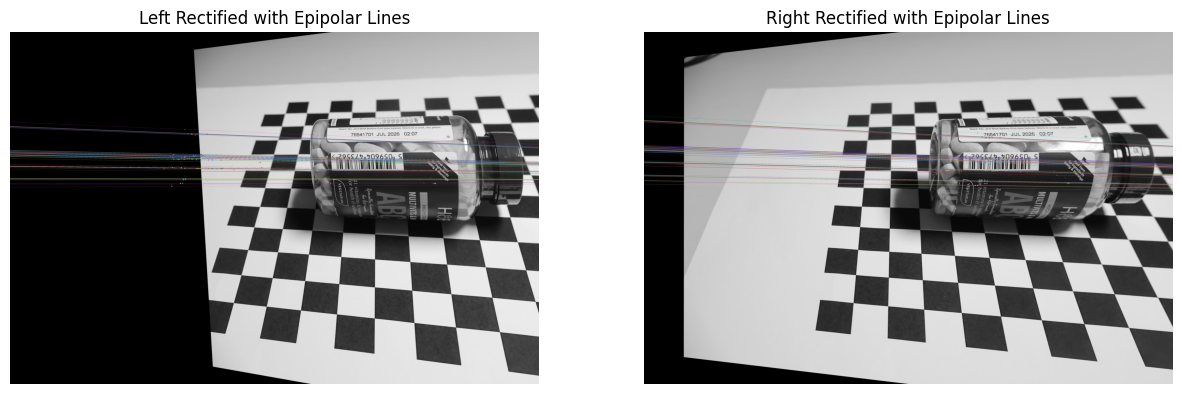

In [129]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def drawlines(img1, img2, lines, pts1, pts2):
    r, c = img1.shape[:2]
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])
        # Ensure pt1 and pt2 are single points (scalars) for cv2.circle
        pt1 = (int(pt1[0][0]), int(pt1[0][1])) if pt1.ndim > 1 else (int(pt1[0]), int(pt1[1]))
        pt2 = (int(pt2[0][0]), int(pt2[0][1])) if pt2.ndim > 1 else (int(pt2[0]), int(pt2[1]))
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, pt1, 5, color, -1)
        img2 = cv2.circle(img2, pt2, 5, color, -1)
    return img1, img2

# Load your stereo images in grayscale for feature detection
imgL = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data6_2D\\IMG_2341.jpg', 0)
imgR = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data6_2D\\IMG_2342.jpg', 0)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(imgL, None)
kp2, des2 = orb.detectAndCompute(imgR, None)

# Create BFMatcher object with the correct norm and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Select the top N matches
N = 204
best_matches = matches[:N]

# Extract the matched keypoints
ptsL = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 1, 2)
ptsR = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 1, 2)

# Find the Fundamental Matrix
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Select only inlier points
ptsL = ptsL[mask.ravel() == 1]
ptsR = ptsR[mask.ravel() == 1]

# Compute the rectification transformations
ret, H1, H2 = cv2.stereoRectifyUncalibrated(ptsL, ptsR, F, imgL.shape[::-1])

if ret:  # Check if rectification is successful
    # Apply the transformations to the images
    imgL_rectified = cv2.warpPerspective(imgL, H1, (imgL.shape[1], imgL.shape[0]))
    imgR_rectified = cv2.warpPerspective(imgR, H2, (imgR.shape[1], imgR.shape[0]))

    # Since the images are now rectified, convert them back to color for line drawing
    imgL_color = cv2.cvtColor(imgL_rectified, cv2.COLOR_GRAY2BGR)
    imgR_color = cv2.cvtColor(imgR_rectified, cv2.COLOR_GRAY2BGR)

    # Compute and draw the epipolar lines
    linesL = cv2.computeCorrespondEpilines(ptsR.reshape(-1, 1, 2), 2, F).reshape(-1, 3)
    img5, img6 = drawlines(imgL_color, imgR_color, linesL, ptsL, ptsR)

    # Compute and draw the epipolar lines for the right image
    linesR = cv2.computeCorrespondEpilines(ptsL.reshape(-1, 1, 2), 1, F).reshape(-1, 3)
    img3, img4 = drawlines(imgR_color, imgL_color, linesR, ptsR, ptsL)

    # Plotting the images with matched points and epipolar lines using matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Left Rectified with Epipolar Lines')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Right Rectified with Epipolar Lines')
    axs[1].axis('off')

    plt.show()

    # Save the rectified images
    cv2.imwrite('D:\\CV\\L_rectified.jpg', imgL_rectified)
    cv2.imwrite('D:\\CV\\R_rectified.jpg', imgR_rectified)


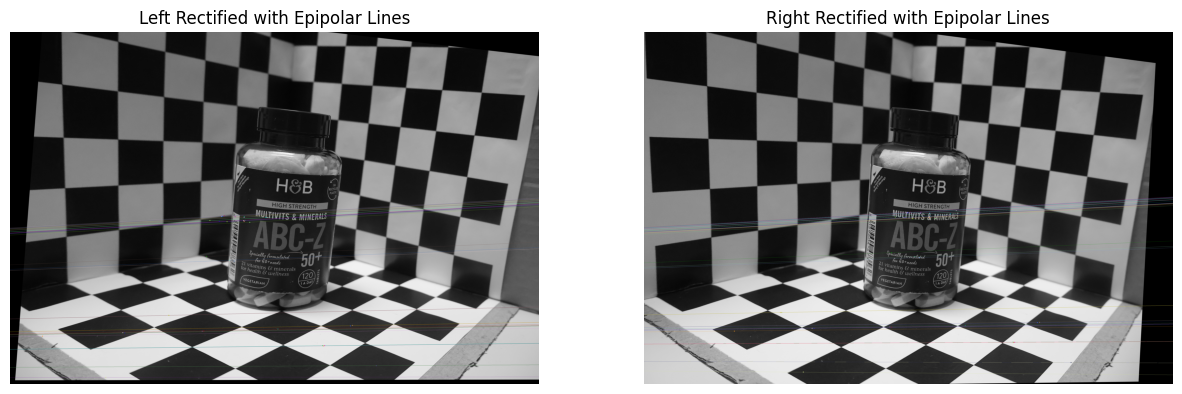

In [173]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def drawlines(img1, img2, lines, pts1, pts2):
    r, c = img1.shape[:2]
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])
        # Ensure pt1 and pt2 are single points (scalars) for cv2.circle
        pt1 = (int(pt1[0][0]), int(pt1[0][1])) if pt1.ndim > 1 else (int(pt1[0]), int(pt1[1]))
        pt2 = (int(pt2[0][0]), int(pt2[0][1])) if pt2.ndim > 1 else (int(pt2[0]), int(pt2[1]))
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, pt1, 5, color, -1)
        img2 = cv2.circle(img2, pt2, 5, color, -1)
    return img1, img2

# Load your stereo images in grayscale for feature detection
imgL = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data8\\IMG_2360.jpg', 0)
imgR = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data8\\IMG_2361.jpg', 0)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(imgL, None)
kp2, des2 = orb.detectAndCompute(imgR, None)

# Create BFMatcher object with the correct norm and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Select the top N matches
N = 58
best_matches = matches[:N]

# Extract the matched keypoints
ptsL = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 1, 2)
ptsR = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 1, 2)

# Find the Fundamental Matrix
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Select only inlier points
ptsL = ptsL[mask.ravel() == 1]
ptsR = ptsR[mask.ravel() == 1]

# Compute the rectification transformations
ret, H1, H2 = cv2.stereoRectifyUncalibrated(ptsL, ptsR, F, imgL.shape[::-1])

if ret:  # Check if rectification is successful
    # Apply the transformations to the images
    imgL_rectified = cv2.warpPerspective(imgL, H1, (imgL.shape[1], imgL.shape[0]))
    imgR_rectified = cv2.warpPerspective(imgR, H2, (imgR.shape[1], imgR.shape[0]))

    # Since the images are now rectified, convert them back to color for line drawing
    imgL_color = cv2.cvtColor(imgL_rectified, cv2.COLOR_GRAY2BGR)
    imgR_color = cv2.cvtColor(imgR_rectified, cv2.COLOR_GRAY2BGR)

    # Compute and draw the epipolar lines
    linesL = cv2.computeCorrespondEpilines(ptsR.reshape(-1, 1, 2), 2, F).reshape(-1, 3)
    img5, img6 = drawlines(imgL_color, imgR_color, linesL, ptsL, ptsR)

    # Compute and draw the epipolar lines for the right image
    linesR = cv2.computeCorrespondEpilines(ptsL.reshape(-1, 1, 2), 1, F).reshape(-1, 3)
    img3, img4 = drawlines(imgR_color, imgL_color, linesR, ptsR, ptsL)

    # Plotting the images with matched points and epipolar lines using matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Left Rectified with Epipolar Lines')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Right Rectified with Epipolar Lines')
    axs[1].axis('off')

    plt.show()

    # Save the rectified images
    cv2.imwrite('D:\\CV\\L_rectified.jpg', imgL_rectified)
    cv2.imwrite('D:\\CV\\R_rectified.jpg', imgR_rectified)


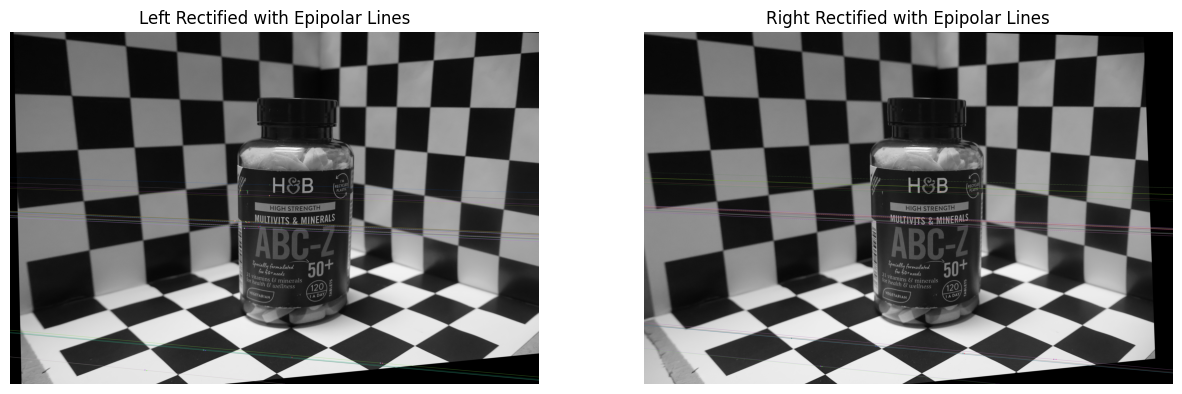

In [218]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def drawlines(img1, img2, lines, pts1, pts2):
    r, c = img1.shape[:2]
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])
        # Ensure pt1 and pt2 are single points (scalars) for cv2.circle
        pt1 = (int(pt1[0][0]), int(pt1[0][1])) if pt1.ndim > 1 else (int(pt1[0]), int(pt1[1]))
        pt2 = (int(pt2[0][0]), int(pt2[0][1])) if pt2.ndim > 1 else (int(pt2[0]), int(pt2[1]))
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, pt1, 5, color, -1)
        img2 = cv2.circle(img2, pt2, 5, color, -1)
    return img1, img2

# Load your stereo images in grayscale for feature detection
imgL = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data8\\IMG_2366.jpg', 0)
imgR = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data8\\IMG_2367.jpg', 0)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(imgL, None)
kp2, des2 = orb.detectAndCompute(imgR, None)

# Create BFMatcher object with the correct norm and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Select the top N matches
N = 60
best_matches = matches[:N]

# Extract the matched keypoints
ptsL = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 1, 2)
ptsR = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 1, 2)

# Find the Fundamental Matrix
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Select only inlier points
ptsL = ptsL[mask.ravel() == 1]
ptsR = ptsR[mask.ravel() == 1]

# Compute the rectification transformations
ret, H1, H2 = cv2.stereoRectifyUncalibrated(ptsL, ptsR, F, imgL.shape[::-1])

if ret:  # Check if rectification is successful
    # Apply the transformations to the images
    imgL_rectified = cv2.warpPerspective(imgL, H1, (imgL.shape[1], imgL.shape[0]))
    imgR_rectified = cv2.warpPerspective(imgR, H2, (imgR.shape[1], imgR.shape[0]))

    # Since the images are now rectified, convert them back to color for line drawing
    imgL_color = cv2.cvtColor(imgL_rectified, cv2.COLOR_GRAY2BGR)
    imgR_color = cv2.cvtColor(imgR_rectified, cv2.COLOR_GRAY2BGR)

    # Compute and draw the epipolar lines
    linesL = cv2.computeCorrespondEpilines(ptsR.reshape(-1, 1, 2), 2, F).reshape(-1, 3)
    img5, img6 = drawlines(imgL_color, imgR_color, linesL, ptsL, ptsR)

    # Compute and draw the epipolar lines for the right image
    linesR = cv2.computeCorrespondEpilines(ptsL.reshape(-1, 1, 2), 1, F).reshape(-1, 3)
    img3, img4 = drawlines(imgR_color, imgL_color, linesR, ptsR, ptsL)

    # Plotting the images with matched points and epipolar lines using matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Left Rectified with Epipolar Lines')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Right Rectified with Epipolar Lines')
    axs[1].axis('off')

    plt.show()

    # Save the rectified images
    cv2.imwrite('D:\\CV\\2L_rectified.jpg', imgL_rectified)
    cv2.imwrite('D:\\CV\\2R_rectified.jpg', imgR_rectified)


[[  73 3896]
 [ 102 3001]
 [ 232 3651]
 ...
 [4893 2764]
 [5116 3366]
 [5443 3979]]
[[-2.45639492e-09  2.66769353e-06 -7.34523206e-03]
 [-2.54857737e-06 -1.21480370e-07 -5.69227762e-02]
 [ 6.86080467e-03  5.60360332e-02  1.00000000e+00]]
[[ 0.00000000e+00  6.09287791e-07 -1.48020575e-03]
 [-5.44696752e-07  6.65904799e-08  1.20923682e+11]
 [ 1.31420193e-03 -1.20923682e+11  1.00000000e+00]]


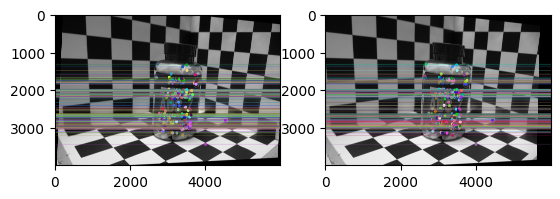

In [255]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,3)
        img1 = cv.circle(img1,tuple(pt1),40,color,-1)
        img2 = cv.circle(img2,tuple(pt2),40,color,-1)
    return img1,img2

img1 = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data8\\IMG_2366.jpg', 0)
img2 = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data8\\IMG_2367.jpg', 0)
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

pts1=[]
pts2=[]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.45*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
print(pts1)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
print(F)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

h1, w1 = img1.shape
h2, w2 = img2.shape
thresh = 0.5
_, H1, H2 = cv.stereoRectifyUncalibrated(
    np.float32(pts1), np.float32(pts2), F, imgSize=(w1, h1), threshold=thresh,
)

############## Undistort (Rectify) ##############
imgL_undistorted = cv.warpPerspective(img1, H1, (w1, h1))
imgR_undistorted = cv.warpPerspective(img2, H2, (w2, h2))
sift1 = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift1.detectAndCompute(imgL_undistorted,None)
kp2, des2 = sift1.detectAndCompute(imgR_undistorted,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

pts1=[]
pts2=[]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.45*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
print(F)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5, img6 = drawlines(imgL_undistorted,imgR_undistorted,lines1,pts1,pts2)

lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3, img4 = drawlines(imgR_undistorted,imgL_undistorted,lines2,pts2,pts1)
plt.figure('rectification')
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

[[-8.44008370e-08 -3.59534978e-07 -1.90739583e-03]
 [-2.38654713e-07 -3.43126857e-07 -7.99339433e-03]
 [ 1.10361542e-03  1.09029646e-02  1.00000000e+00]]


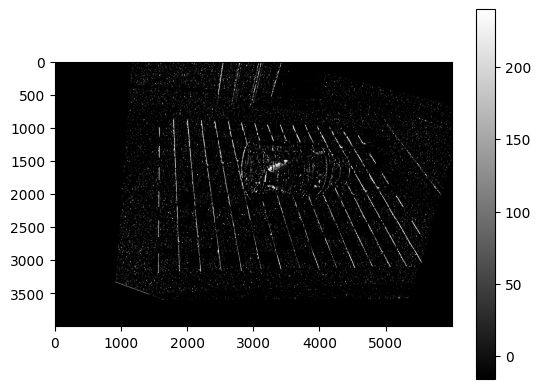

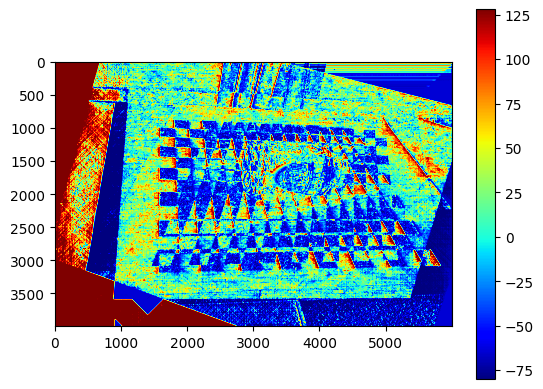

In [253]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data6_2D\\FD10.jpg', 0)
img2 = cv2.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data6_2D\\FD11.jpg', 0)
sift = cv.SIFT.create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

pts1=[]
pts2=[]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.45*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
print(F)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

h1, w1 = img1.shape
h2, w2 = img2.shape
thresh = 0
_, H1, H2 = cv.stereoRectifyUncalibrated(
    np.float32(pts1), np.float32(pts2), F, imgSize=(w1, h1), threshold=thresh,
)

############## Undistort (Rectify) ##############
imgL_undistorted = cv.warpPerspective(img1, H1, (w1, h1))
imgR_undistorted = cv.warpPerspective(img2, H2, (w2, h2))

# Using StereoBM
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity_BM = stereo.compute(imgL_undistorted, imgR_undistorted)
plt.imshow(disparity_BM, "gray")
plt.colorbar()
plt.show()
# Using StereoSGBM
# Set disparity parameters. Note: disparity range is tuned according to
#  specific parameters obtained through trial and error.
win_size = 2
min_disp = -4
max_disp = 9
num_disp = max_disp - min_disp  # Needs to be divisible by 16
stereo = cv.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=5,
    uniquenessRatio=5,
    speckleWindowSize=5,
    speckleRange=5,
    disp12MaxDiff=2,
    P1=8 * 3 * win_size ** 2,
    P2=32 * 3 * win_size ** 2,
)
disparity_SGBM = stereo.compute(imgL_undistorted, imgR_undistorted)
plt.imshow(disparity_SGBM, cmap='jet')
plt.colorbar()
plt.show()

In [239]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data8\\IMG_2366.jpg', 0)
img2 = cv.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data8\\IMG_2367.jpg', 0)
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# FLANN parameters for ORB
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH, 
                   table_number = 6, 
                   key_size = 12,     
                   multi_probe_level = 1) 
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

pts1=[]
pts2=[]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance: # 0.7是一个常见的比例测试阈值
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

h1, w1 = img1.shape
h2, w2 = img2.shape
thresh = 0
_, H1, H2 = cv.stereoRectifyUncalibrated(
    np.float32(pts1), np.float32(pts2), F, imgSize=(w1, h1), threshold=thresh,
)

############## Undistort (Rectify) ##############
imgL_undistorted = cv.warpPerspective(img1, H1, (w1, h1))
imgR_undistorted = cv.warpPerspective(img2, H2, (w2, h2))

# Using StereoBM
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity_BM = stereo.compute(imgL_undistorted, imgR_undistorted)
plt.imshow(disparity_BM, "gray")
plt.colorbar()
plt.show()

# Using StereoSGBM
# Note: Adjust these parameters based on your setup and images for better results
stereo = cv.StereoSGBM_create(
    minDisparity = -1,
    numDisparities = 16, # 必须是16的倍数
    blockSize = 5,
    P1 = 8 * 3 * 5 ** 2,
    P2 = 32 * 3 * 5 ** 2,
    disp12MaxDiff = 1,
    uniquenessRatio = 15,


SyntaxError: unexpected EOF while parsing (2953886858.py, line 66)

4.9.0


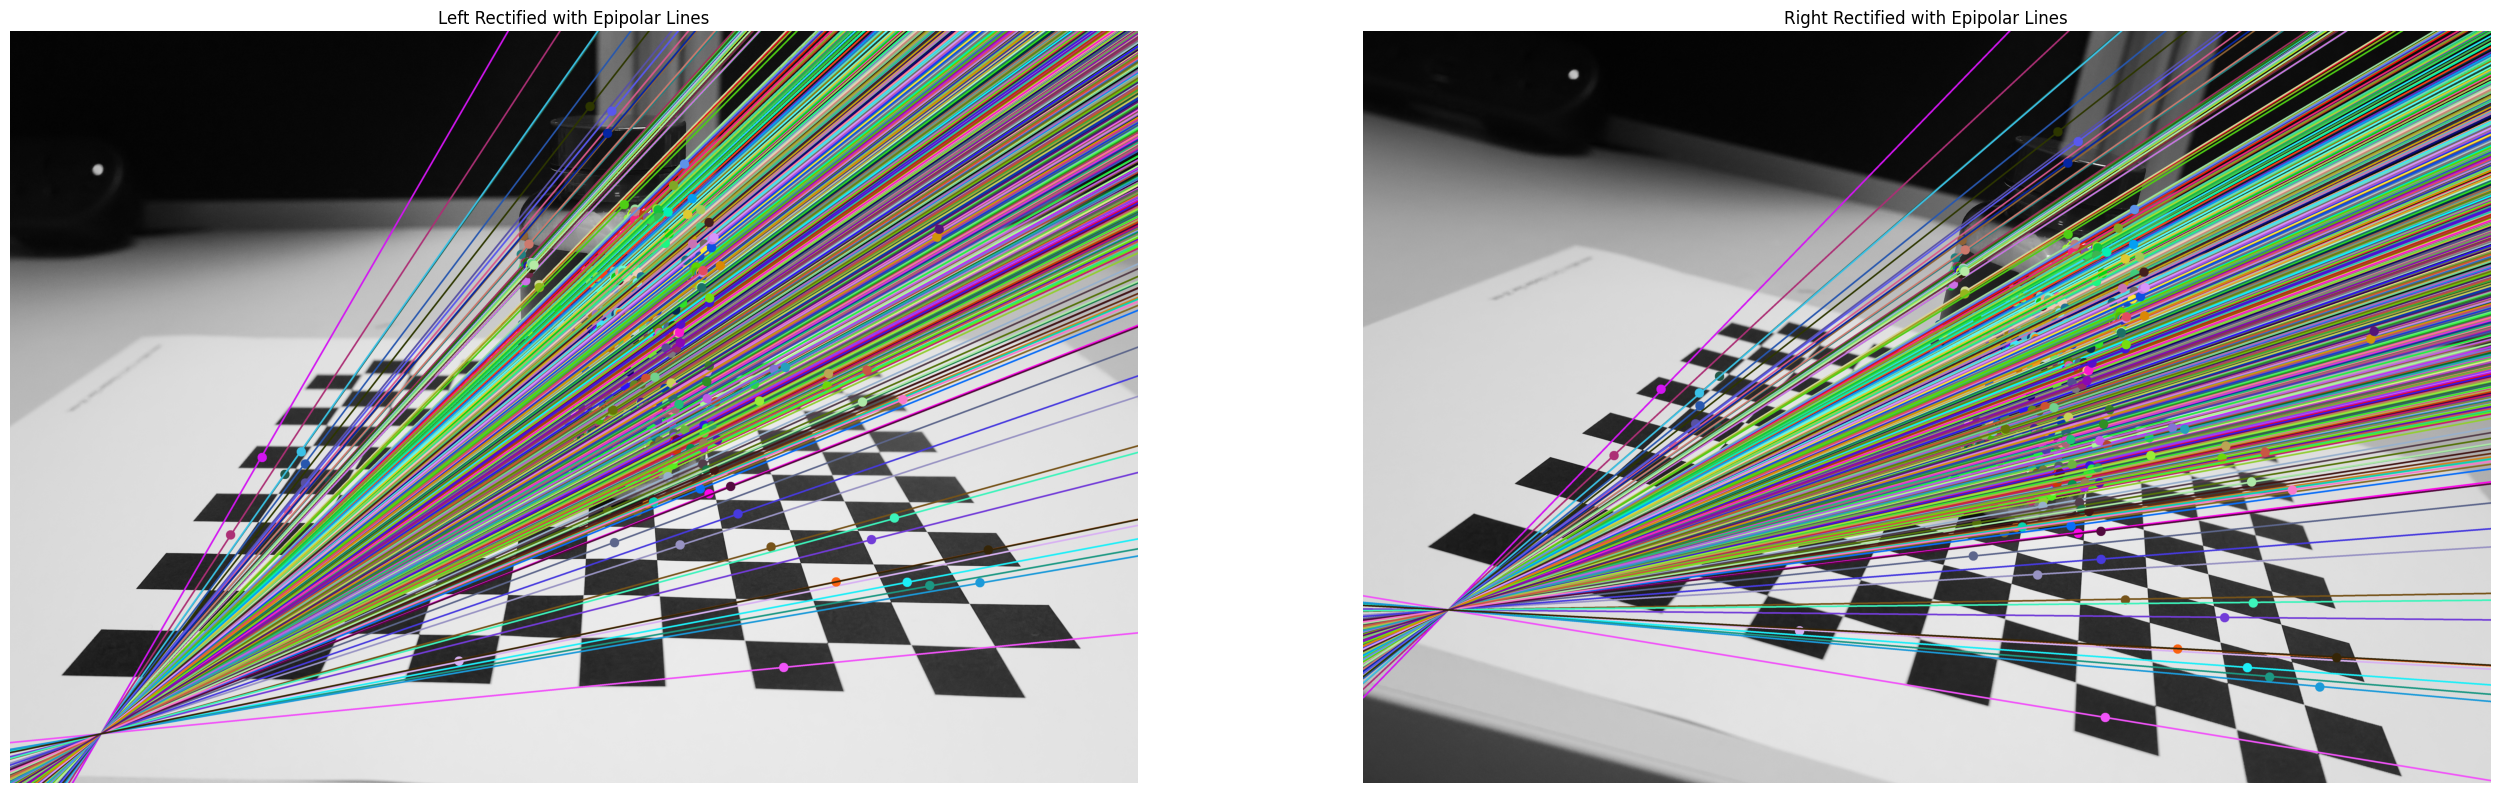

In [13]:

import cv2 as cv
print(cv.__version__)
import numpy as np
import matplotlib.pyplot as plt
 
img1 = cv.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data7\\HG2.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('C:\\Users\\96134\\Desktop\\ComputerVision\\RAW_data7\\HG11.jpg', cv.IMREAD_GRAYSCALE)
 
sift = cv.SIFT.create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
 
imgSift = cv.drawKeypoints(
    img1, kp1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite("SIFTKeypoints.png", imgSift)
 
 
# Match keypoints in both images
# Based on: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
 
# Keep good matches: calculate distinctive image features
# Lowe, D.G. Distinctive Image Features from Scale-Invariant Keypoints. International Journal of Computer Vision 60, 91–110 (2004). https://doi.org/10.1023/B:VISI.0000029664.99615.94
# https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf
matchesMask = [[0, 0] for i in range(len(matches))]
good = []
pts1 = []
pts2 = []
 
for i, (m, n) in enumerate(matches):
    if m.distance < 0.5*n.distance:
        # Keep this keypoint pair
        matchesMask[i] = [1, 0]
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
 
# Draw the keypoint matches between both pictures
# Still based on: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)
 
keypoint_matches = cv.drawMatchesKnn(
    img1, kp1, img2, kp2, matches, None, **draw_params)
cv.imwrite("Keypointmatches.png", keypoint_matches)
 
 
 
 
# Calculate the fundamental matrix for the cameras
# https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
fundamental_matrix, inliers = cv.findFundamentalMat(pts1, pts2, cv.FM_RANSAC,5.0)
 
# We select only inlier points
pts1 = pts1[inliers.ravel() == 1]
pts2 = pts2[inliers.ravel() == 1]
 
# Visualize epilines
# Adapted from: https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html
def drawlines(img1src, img2src, lines, pts1src, pts2src):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c = img1src.shape
    img1color = cv.cvtColor(img1src, cv.COLOR_GRAY2BGR)
    img2color = cv.cvtColor(img2src, cv.COLOR_GRAY2BGR)
    # Edit: use the same random seed so that two images are comparable!
    np.random.seed(0)
    for r, pt1, pt2 in zip(lines, pts1src, pts2src):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1color = cv.line(img1color, (x0, y0), (x1, y1), color, 7)
        img1color = cv.circle(img1color, tuple(pt1), 25, color, -1)
        img2color = cv.circle(img2color, tuple(pt2), 25, color, -1)
    return img1color, img2color
 
 
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(
    pts2.reshape(-1, 1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)
 
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(
    pts1.reshape(-1, 1, 2), 1, fundamental_matrix)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)
 
fig, axs = plt.subplots(1, 2, figsize=(32, 10))
axs[0].imshow(img5)
axs[0].set_title('Left Rectified with Epipolar Lines')
axs[0].axis('off')
 
axs[1].imshow(img3)
axs[1].set_title('Right Rectified with Epipolar Lines')
axs[1].axis('off')
 
plt.show()
